In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#mnist dataset has already grayscaled, resized and splitted into train and test set, so we do not have to do those things
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 51s 4us/step


In [3]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) # (60000, 28, 28) means there are 60000 images and every image ahs 28 columns and 28 rows. so the total pixels for each image is 28x28 = 784

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [5]:
#training set 60000
#testing set 10000
#image dimension 28 x 28
#grayscale channel = 1 color channel

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

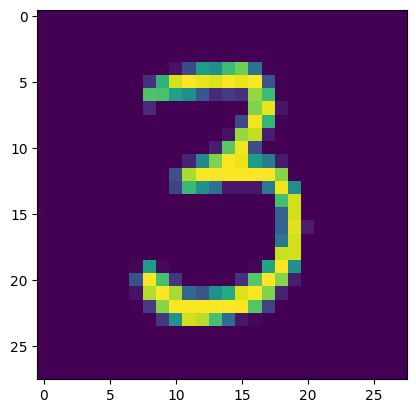

In [15]:
plt.imshow(X_train[50])

In [16]:
print(Y_train[50])

3


In [17]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [18]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [19]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#all the images have same dimensions, so we do not need to resize them
#scaling the values
#please not that this is not the proper way to scale the data
X_train = X_train / 255
X_test = X_test / 255

In [23]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='sigmoid')
])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9575 - loss: 0.1445
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9702 - loss: 0.1024
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0816
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9805 - loss: 0.0675
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0563
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0477
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9873 - loss: 0.0418
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0344
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0301
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0258
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0255
Epoch 12/20
1875/1875 ━━━━━━━━

In [30]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9719 - loss: 0.1789
0.9747999906539917


In [31]:
X_test.shape

(10000, 28, 28)

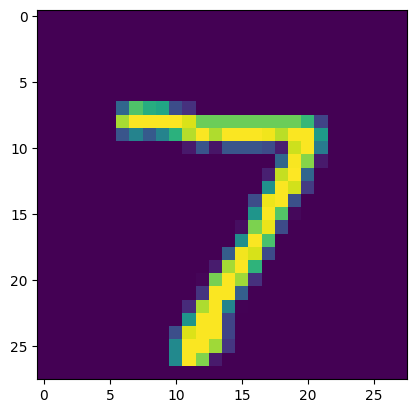

In [32]:
plt.imshow(X_test[0])

In [33]:
print(Y_test[0])

7


In [34]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


In [35]:
Y_pred.shape

(10000, 10)

In [36]:
print(Y_pred[0])

[2.8444984e-04 8.3999174e-07 9.6349585e-01 9.9969262e-01 5.3951618e-07
 7.0967047e-08 9.8952504e-12 1.0000000e+00 5.1067156e-01 4.7164285e-01]


In [37]:
#converting the prediction probabilities into the class label
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(3), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [39]:
conf_matrix = confusion_matrix(Y_test, Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 971    0    0    2    0    1    1    1    4    0]
 [   1 1123    0    3    0    1    2    2    3    0]
 [   4   14  984    7    1    0    7    6    8    1]
 [   0    0    3  992    0    3    0    3    2    7]
 [   1    0    4    0  960    0    8    2    1    6]
 [   2    0    0   20    2  856    5    1    4    2]
 [   6    1    0    0    4    4  942    0    1    0]
 [   2    0   10    9    4    0    0  991    3    9]
 [   1    0    2   11    3    6    4    4  940    3]
 [   1    2    0   10   13    6    2    4    5  966]], shape=(10, 10), dtype=int32)


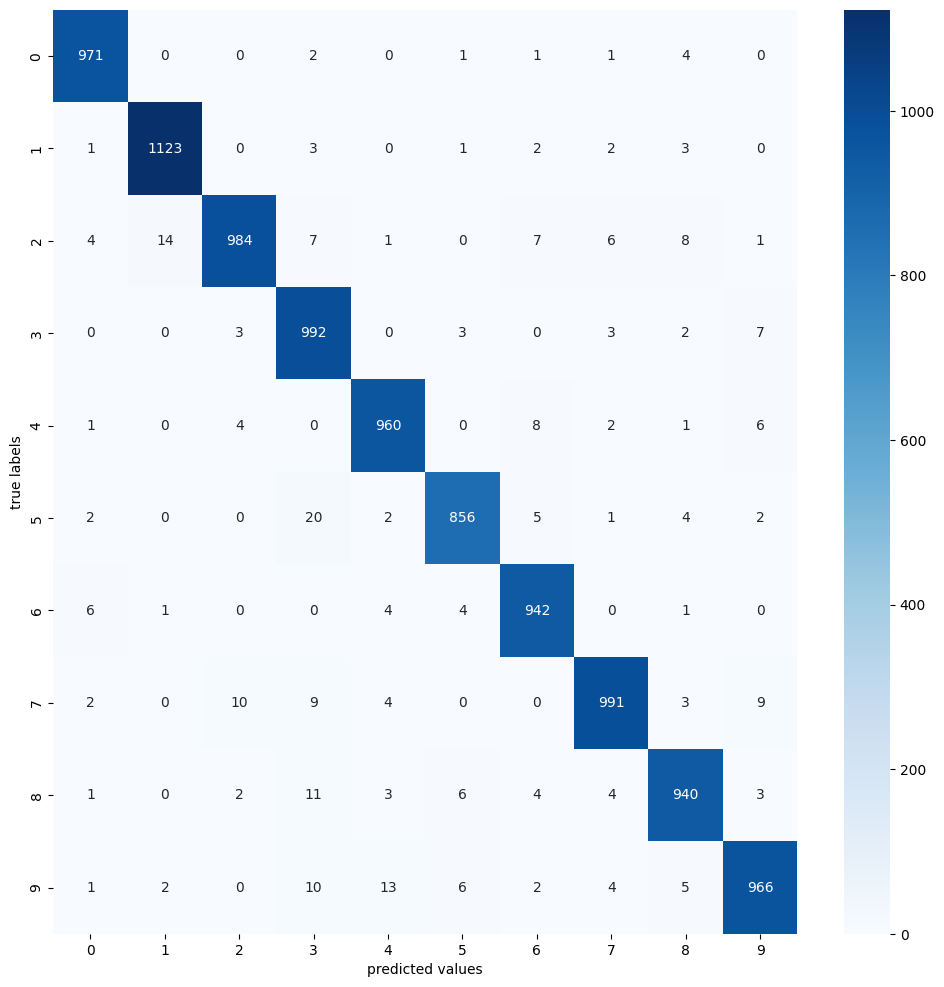

In [42]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, cbar=True, yticklabels=True, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted values')
plt.ylabel('true labels')
plt.show()

In [ ]:
#building the predictive system

In [43]:
input_img = cv2.imread('MNIST_digit.png')

In [44]:
type(input_img)

numpy.ndarray

In [45]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


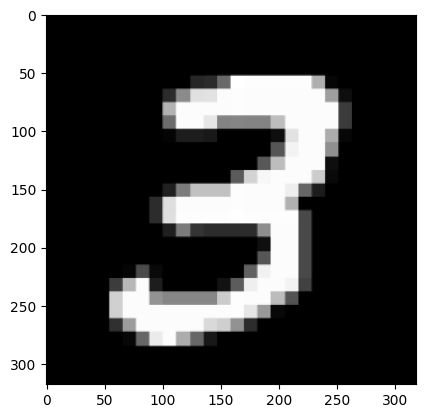

In [46]:
plt.imshow(input_img)

In [ ]:
input_img.shape #here that image is a rgb one. thats why it has the 3

(318, 318, 3)

In [ ]:
#convert the image to grayscale
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

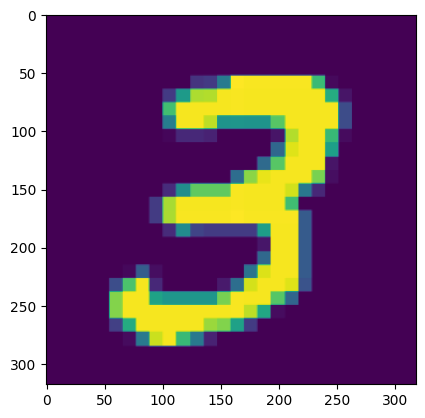

In [49]:
plt.imshow(grayscale)

In [50]:
grayscale.shape

(318, 318)

In [51]:
#resize the image
input_image_resized = cv2.resize(grayscale, (28, 28))

In [52]:
input_image_resized.shape

(28, 28)

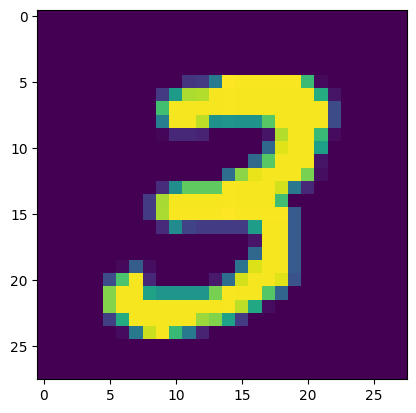

In [54]:
plt.imshow(input_image_resized)

In [55]:
#scale the image values
input_image_resized = input_image_resized / 255

In [56]:
print(input_image_resized)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
image_reshaped = np.reshape(input_image_resized, [1, 28, 28]) # 1 image with 28 x 28 size

In [58]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[2.5864184e-18 3.1631879e-16 1.3843926e-09 1.0000000e+00 1.0984106e-23
  5.7195079e-02 2.1018307e-24 1.6533161e-07 4.2723116e-02 1.9064539e-05]]


In [59]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
